In [2]:
import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt
%matplotlib inline
from tqdm import tqdm_notebook
from sklearn.preprocessing import StandardScaler
from sklearn.svm import NuSVR, SVR
from sklearn.metrics import mean_absolute_error, log_loss
pd.options.display.precision = 15
import lightgbm as lgb
import xgboost as xgb
from catboost import CatBoostRegressor, CatBoostClassifier
import time
import datetime
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.model_selection import StratifiedKFold, KFold, RepeatedKFold, GroupKFold, GridSearchCV, train_test_split, TimeSeriesSplit
from sklearn import metrics
from sklearn import linear_model
from sklearn.metrics import roc_auc_score
from tqdm import tqdm

import gc
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import json
%matplotlib inline

%env JOBLIB_TEMP_FOLDER=/tmp


env: JOBLIB_TEMP_FOLDER=/tmp


In [28]:
# 转化为可提交格式
output_path = './output/corr02/'
lgb_rank_res = pd.read_csv('./output/corr02/lgb_11_205fea_test_rank_score0.8615.txt',sep=' ',header=None)
#xgb_rank_res = pd.read_csv('./output/xgb2_fload_5_CV_rank_score0.9509.txt',sep=' ',header=None)
lgb_rank_res[1] = lgb_rank_res[[1]].apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)))

print(lgb_rank_res.head())
lgb_rank_res.to_csv(output_path + 'r_11_205fea.txt',sep=' ',index=0,header=0)

                                  0                  1
0  f5dcfe9b9e8d496d893cfcba8fcac1d4  0.450160932575088
1  68883d45646d44d8b851476058e4500d  0.872871604155896
2  2b93dfa58f10463a937cd42cc42e54f7  0.356920100728783
3  94fc13e16dac4642ab7544d8889e8579  0.876957457098544
4  6be5af4911964a31a0b5cf115799ace6  0.475409836065574


In [10]:
# 融seed
import copy
from tqdm import tqdm
null_data_res = []
train_path = r"./output/b_seeds/"
filenames = os.listdir(train_path)
#filenames.sort(key=lambda x: int(x[6:8]))
train_data = []
lgb_rank_res = pd.read_csv('./output/b_seeds/lgb_4_remain180fea_test_corr_cols_rank_score0.8663.txt',sep=' ',header=None)
final_rank = copy.deepcopy(lgb_rank_res)
corr_rank = copy.deepcopy(lgb_rank_res)
#filenames = ["20200801.csv","20200802.csv"]
for file in tqdm(filenames):
    try:
        #print(file)
        read_data = pd.read_csv(train_path+file,sep=' ',header=None)
        final_rank[1] = (read_data[1] + final_rank[1])
        corr_rank[file[:8]] = read_data[1]
    except:
        pass

final_rank[1] = final_rank[[1]].apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)))
corr_rank.corr()

100%|██████████| 14/14 [00:00<00:00, 73.62it/s]


,1,lgb_11_r,lgb_2011,lgb_2021,lgb_325_,lgb_36_r,lgb_38_r,lgb_47_r,lgb_4_re,lgb_67_r,lgb_95_r,xgb_11_r,xgb_2011,xgb_38_r,xgb_47_r
1,1.000000000000000,0.997121052417490,0.997301689416626,0.997295926055060,0.997383347639523,0.997150076381153,0.997256996472320,0.997350828087201,1.000000000000000,0.997370779980358,0.997321667102677,0.994055043867654,0.994029631077795,0.993896293737214,0.994167017609684
lgb_11_r,0.997121052417490,1.000000000000000,0.997325777331028,0.997381638642697,0.997205615787772,0.997340035359333,0.997249931660179,0.997066478346233,0.997121052417490,0.997356312730026,0.997127582128825,0.993726728484905,0.993471021241381,0.993634615531922,0.993771755840547
lgb_2011,0.997301689416626,0.997325777331028,1.000000000000000,0.997395701617205,0.997396838005674,0.997312486584954,0.997328726374314,0.997306981032132,0.997301689416626,0.997424559419921,0.997344909361098,0.993984466693174,0.993922744841192,0.993925436820204,0.994098437684580
lgb_2021,0.997295926055060,0.997381638642697,0.997395701617205,1.000000000000000,0.997435267862982,0.997394572966628,0.997377731133697,0.997432661319606,0.997295926055060,0.997469335271413,0.997321537557073,0.993911954309964,0.993854561767633,0.993813936574642,0.994085031831153
lgb_325_,0.997383347639523,0.997205615787772,0.997396838005674,0.997435267862982,1.000000000000000,0.997447512328192,0.997417617432568,0.997485147854286,0.997383347639523,0.997491254569939,0.997448771723396,0.994130070707223,0.994119408130370,0.993965170455019,0.994250334107414
lgb_36_r,0.997150076381153,0.997340035359333,0.997312486584954,0.997394572966628,0.997447512328192,1.000000000000000,0.997239117908422,0.997330822399905,0.997150076381153,0.997538001655542,0.997326687556633,0.993938716552262,0.993848281518145,0.993853925576513,0.994072108997162
lgb_38_r,0.997256996472320,0.997249931660179,0.997328726374314,0.997377731133697,0.997417617432568,0.997239117908422,1.000000000000000,0.997329132536933,0.997256996472320,0.997298833379457,0.997426359239440,0.993966102973027,0.993887295352057,0.993778000118833,0.994071237690030
lgb_47_r,0.997350828087201,0.997066478346233,0.997306981032132,0.997432661319606,0.997485147854286,0.997330822399905,0.997329132536933,1.000000000000000,0.997350828087201,0.997378425791602,0.997415480563153,0.994001508142042,0.994070418147010,0.993879735866968,0.994152357587502
lgb_4_re,1.000000000000000,0.997121052417490,0.997301689416626,0.997295926055060,0.997383347639523,0.997150076381153,0.997256996472320,0.997350828087201,1.000000000000000,0.997370779980358,0.997321667102677,0.994055043867654,0.994029631077795,0.993896293737214,0.994167017609684
lgb_67_r,0.997370779980358,0.997356312730026,0.997424559419921,0.997469335271413,0.997491254569939,0.997538001655542,0.997298833379457,0.997378425791602,0.997370779980358,1.000000000000000,0.997376347374723,0.993967448656103,0.993809814763257,0.993857302559091,0.994090162137711


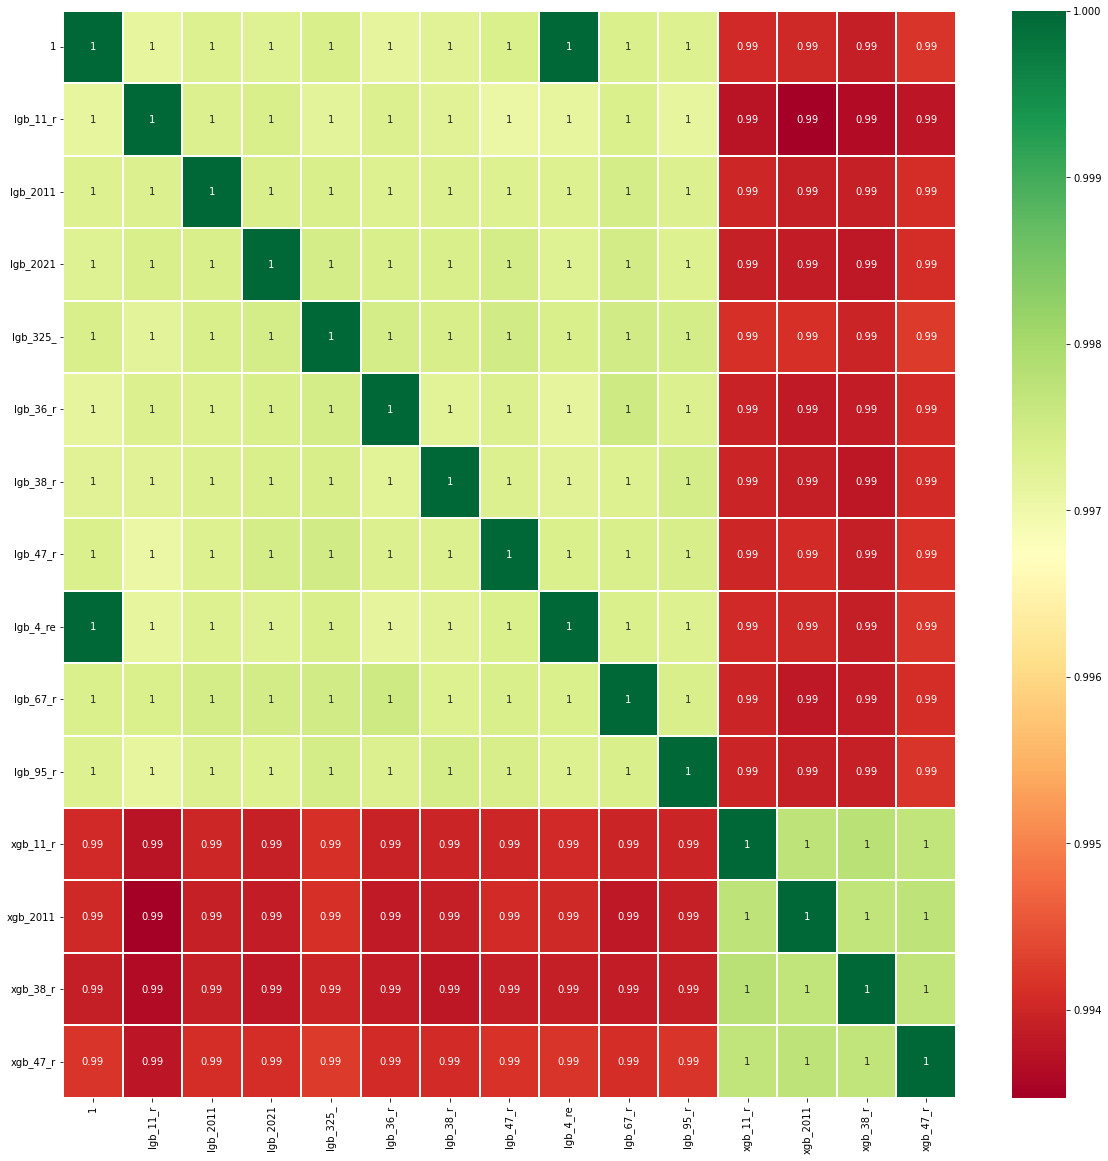

In [11]:
sns.heatmap(corr_rank[list(corr_rank.columns)].corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(20,20)
plt.show()

In [15]:

final_rank.to_csv(train_path + 'merge_seeds_lgb+xgb.txt',sep=' ',index=0,header=0)

In [29]:
# 选择历史最高分融

output_path = './output/final_output/'
lgb_rank_res1 = pd.read_csv('./output/final_output/lgb_b_add_cols_final_score0.8657.txt',sep=' ',header=None)
lgb_rank_res2 = pd.read_csv('./output/final_output/lgb_final_usual_score8625.txt',sep=' ',header=None)
lgb_rank_res3 = pd.read_csv('./output/final_output/merge_seeds_lgb+xgb.txt',sep=' ',header=None)

cat_rank_res1 = pd.read_csv('./output/seeds/cat_11_remain174fea_test_corr_cols_rank_score0.8653.txt',sep=' ',header=None)
cat_rank_res2 = pd.read_csv('./output/seeds/cat_47_remain174fea_test_corr_cols_rank_score0.8661.txt',sep=' ',header=None)
cat_rank_res3 = pd.read_csv('./output/seeds/cat_38_remain174fea_test_corr_cols_rank_score0.8652.txt',sep=' ',header=None)

lgb_rank_res1[1] = lgb_rank_res1[1].rank().values.reshape(-1, 1)        
lgb_rank_res2[1] = lgb_rank_res2[1].rank().values.reshape(-1, 1)      
lgb_rank_res3[1] = lgb_rank_res3[1].rank().values.reshape(-1, 1)    

cat_rank_res1[1] = (cat_rank_res1[1] + cat_rank_res2[1] + cat_rank_res3[1])/3
#lgb_rank_res1.corr()
lgb_rank_res1.head()
import copy
final_rank_res = copy.deepcopy(lgb_rank_res1)
final_rank_res[1] = 0.2*lgb_rank_res1[1] + 0.4*lgb_rank_res2[1] + 0.2*lgb_rank_res3[1] + 0.2*cat_rank_res1[1]
final_rank_res[1] = final_rank_res[[1]].apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)))

print(final_rank_res.head())
final_rank_res.to_csv(output_path + 'merge_3lgb_cat_613_619_625_865.txt',sep=' ',index=0,header=0) #0.8632

                                  0                  1
0  f5dcfe9b9e8d496d893cfcba8fcac1d4  0.609777463542396
1  68883d45646d44d8b851476058e4500d  0.115564878860037
2  2b93dfa58f10463a937cd42cc42e54f7  0.623891375350458
3  94fc13e16dac4642ab7544d8889e8579  0.215172677530021
4  6be5af4911964a31a0b5cf115799ace6  0.602620456278668
